In [1]:
import requests
import numpy as np
import pandas as pd
import datetime
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
load_dotenv('.env')

fmp_key = os.getenv('FMP_API')

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

timeframe = "1D"

start_date = pd.Timestamp("2016-03-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-31", tz="America/New_York").isoformat()

type(fmp_key)

str

In [3]:
company = 'AMD'

inc_stmt = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?apikey={fmp_key}').json()
bal_sht = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?apikey={fmp_key}').json()
bal_sht

[{'date': '2020-12-26',
  'symbol': 'AMD',
  'reportedCurrency': 'USD',
  'fillingDate': '2021-01-29',
  'acceptedDate': '2021-01-29 17:24:00',
  'period': 'FY',
  'cashAndCashEquivalents': 1595000000,
  'shortTermInvestments': 695000000,
  'cashAndShortTermInvestments': 2290000000,
  'netReceivables': 2066000000,
  'inventory': 1399000000,
  'otherCurrentAssets': 388000000,
  'totalCurrentAssets': 6143000000,
  'propertyPlantEquipmentNet': 641000000,
  'goodwill': 289000000,
  'intangibleAssets': 0.0,
  'goodwillAndIntangibleAssets': 289000000,
  'longTermInvestments': 63000000,
  'taxAssets': 0.0,
  'otherNonCurrentAssets': 0.0,
  'totalNonCurrentAssets': 930000000,
  'otherAssets': 1889000000,
  'totalAssets': 8962000000,
  'accountPayables': 468000000,
  'shortTermDebt': 0.0,
  'taxPayables': 0.0,
  'deferredRevenue': 0.0,
  'otherCurrentLiabilities': 1949000000,
  'totalCurrentLiabilities': 2417000000,
  'longTermDebt': 330000000,
  'deferredRevenueNonCurrent': 0.0,
  'deferredTax

In [4]:
inc_stmt

[{'date': '2020-12-26',
  'symbol': 'AMD',
  'reportedCurrency': 'USD',
  'fillingDate': '2021-01-29',
  'acceptedDate': '2021-01-29 17:24:00',
  'period': 'FY',
  'revenue': 9763000000,
  'costOfRevenue': 5416000000,
  'grossProfit': 4347000000,
  'grossProfitRatio': 0.44525248386766364,
  'researchAndDevelopmentExpenses': 1983000000,
  'generalAndAdministrativeExpenses': 995000000,
  'sellingAndMarketingExpenses': 0.0,
  'otherExpenses': -47000000,
  'operatingExpenses': 2978000000,
  'costAndExpenses': 8394000000,
  'interestExpense': 47000000,
  'depreciationAndAmortization': 312000000,
  'ebitda': 1681000000,
  'ebitdaratio': 0.1721806821673666,
  'operatingIncome': 1369000000,
  'operatingIncomeRatio': 0.14022329202089523,
  'totalOtherIncomeExpensesNet': 0.0,
  'incomeBeforeTax': 1275000000,
  'incomeBeforeTaxRatio': 0.1305951039639455,
  'incomeTaxExpense': -1210000000,
  'netIncome': 2490000000,
  'netIncomeRatio': 0.25504455597664655,
  'eps': 2.1030405405405403,
  'epsdilute

In [5]:
avg_rev_growth = ((1+(inc_stmt[0]['revenue'] - inc_stmt[1]['revenue']) / inc_stmt[1]['revenue']) * (1+(inc_stmt[1]['revenue'] - inc_stmt[2]['revenue']) / inc_stmt[2]['revenue']) * (1+(inc_stmt[2]['revenue'] - inc_stmt[3]['revenue']) / inc_stmt[3]['revenue']) * (1+(inc_stmt[3]['revenue'] - inc_stmt[4]['revenue']) / inc_stmt[4]['revenue']))**(1/4) -1

net_income = inc_stmt[0]['netIncome']

avg_rev_growth

0.22952683348150504

In [6]:
current_inc_stmt_df = pd.DataFrame.from_dict(inc_stmt[0], orient='index')
current_inc_stmt_df = current_inc_stmt_df[6:27]
current_inc_stmt_df.columns = ['2020 Current']
current_inc_stmt_df['Pct of Revenue'] = current_inc_stmt_df / current_inc_stmt_df.iloc[0]
current_inc_stmt_df['2019'] = pd.DataFrame.from_dict(inc_stmt[1], orient='index')
current_inc_stmt_df['2018'] = pd.DataFrame.from_dict(inc_stmt[2], orient='index')
current_inc_stmt_df['2017'] = pd.DataFrame.from_dict(inc_stmt[3], orient='index')
current_inc_stmt_df['2016'] = pd.DataFrame.from_dict(inc_stmt[4], orient='index')
complete_inc_stmt_df = current_inc_stmt_df[['2016', '2017', '2018', '2019', '2020 Current', 'Pct of Revenue']]
complete_inc_stmt_df 

2016        2017        2018  \
revenue                           4272000000  5253000000  6475000000   
costOfRevenue                     3274000000  3466000000  4028000000   
grossProfit                        998000000  1787000000  2447000000   
grossProfitRatio                    0.233614    0.340187    0.377915   
researchAndDevelopmentExpenses    1008000000  1196000000  1434000000   
generalAndAdministrativeExpenses   460000000   516000000   562000000   
sellingAndMarketingExpenses              0.0         0.0         0.0   
otherExpenses                       80000000  -9000000.0         0.0   
operatingExpenses                 1380000000  1672000000  2008000000   
costAndExpenses                   4654000000  5138000000  6036000000   
interestExpense                    156000000   126000000   121000000   
depreciationAndAmortization        133000000   144000000   170000000   
ebitda                            -249000000   259000000   609000000   
ebitdaratio                        -0.058287    0.049305    0.094054   
operatingIncome                   -382000000   115000000   439000000   
operatingIncomeRatio               -0.089419    0.021892    0.067799   
totalOtherIncomeExpensesNet         88000000         0.0  -3000000.0   
incomeBeforeTax                   -448000000  -8000000.0   330000000   
incomeBeforeTaxRatio               -0.104869   -0.001523    0.050965   
incomeTaxExpense                    39000000    19000000  -9000000.0   
netIncome                         -497000000   -33000000   337000000   

                                        2019 2020 Current Pct of Revenue  
revenue                           6731000000   9763000000            1.0  
costOfRevenue                     3863000000   5416000000       0.554748  
grossProfit                       2868000000   4347000000       0.445252  
grossProfitRatio                    0.426088     0.445252            0.0  
researchAndDevelopmentExpenses    1547000000   1983000000       0.203114  
generalAndAdministrativeExpenses   750000000    995000000       0.101915  
sellingAndMarketingExpenses              0.0          0.0            0.0  
otherExpenses                     -165000000    -47000000      -0.004814  
operatingExpenses                 2413000000   2978000000       0.305029  
costAndExpenses                   6276000000   8394000000       0.859777  
interestExpense                     94000000     47000000       0.004814  
depreciationAndAmortization        222000000    312000000       0.031957  
ebitda                             677000000   1681000000       0.172181  
ebitdaratio                         0.100579     0.172181            0.0  
operatingIncome                    455000000   1369000000       0.140223  
operatingIncomeRatio                0.067598     0.140223            0.0  
totalOtherIncomeExpensesNet       -3000000.0          0.0            0.0  
incomeBeforeTax                    372000000   1275000000       0.130595  
incomeBeforeTaxRatio                0.055267     0.130595            0.0  
incomeTaxExpense                    44000000  -1210000000      -0.123937  
netIncome                          341000000   2490000000       0.255045

In [7]:
complete_inc_stmt_df['2021 est'] = (complete_inc_stmt_df['2020 Current']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
complete_inc_stmt_df['2022 est'] = (complete_inc_stmt_df['2021 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
complete_inc_stmt_df['2023 est'] = (complete_inc_stmt_df['2022 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
complete_inc_stmt_df['2024 est'] = (complete_inc_stmt_df['2023 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
complete_inc_stmt_df['2025 est'] = (complete_inc_stmt_df['2024 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
complete_inc_stmt_df

<ipython-input-7-b2379454aba4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_inc_stmt_df['2021 est'] = (complete_inc_stmt_df['2020 Current']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
<ipython-input-7-b2379454aba4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_inc_stmt_df['2022 est'] = (complete_inc_stmt_df['2021 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
<ipython-input-7-b2379454aba4>:3: SettingWithCopyWarning: 
A v

2016        2017        2018  \
revenue                           4272000000  5253000000  6475000000   
costOfRevenue                     3274000000  3466000000  4028000000   
grossProfit                        998000000  1787000000  2447000000   
grossProfitRatio                    0.233614    0.340187    0.377915   
researchAndDevelopmentExpenses    1008000000  1196000000  1434000000   
generalAndAdministrativeExpenses   460000000   516000000   562000000   
sellingAndMarketingExpenses              0.0         0.0         0.0   
otherExpenses                       80000000  -9000000.0         0.0   
operatingExpenses                 1380000000  1672000000  2008000000   
costAndExpenses                   4654000000  5138000000  6036000000   
interestExpense                    156000000   126000000   121000000   
depreciationAndAmortization        133000000   144000000   170000000   
ebitda                            -249000000   259000000   609000000   
ebitdaratio                        -0.058287    0.049305    0.094054   
operatingIncome                   -382000000   115000000   439000000   
operatingIncomeRatio               -0.089419    0.021892    0.067799   
totalOtherIncomeExpensesNet         88000000         0.0  -3000000.0   
incomeBeforeTax                   -448000000  -8000000.0   330000000   
incomeBeforeTaxRatio               -0.104869   -0.001523    0.050965   
incomeTaxExpense                    39000000    19000000  -9000000.0   
netIncome                         -497000000   -33000000   337000000   

                                        2019 2020 Current Pct of Revenue  \
revenue                           6731000000   9763000000            1.0   
costOfRevenue                     3863000000   5416000000       0.554748   
grossProfit                       2868000000   4347000000       0.445252   
grossProfitRatio                    0.426088     0.445252            0.0   
researchAndDevelopmentExpenses    1547000000   1983000000       0.203114   
generalAndAdministrativeExpenses   750000000    995000000       0.101915   
sellingAndMarketingExpenses              0.0          0.0            0.0   
otherExpenses                     -165000000    -47000000      -0.004814   
operatingExpenses                 2413000000   2978000000       0.305029   
costAndExpenses                   6276000000   8394000000       0.859777   
interestExpense                     94000000     47000000       0.004814   
depreciationAndAmortization        222000000    312000000       0.031957   
ebitda                             677000000   1681000000       0.172181   
ebitdaratio                         0.100579     0.172181            0.0   
operatingIncome                    455000000   1369000000       0.140223   
operatingIncomeRatio                0.067598     0.140223            0.0   
totalOtherIncomeExpensesNet       -3000000.0          0.0            0.0   
incomeBeforeTax                    372000000   1275000000       0.130595   
incomeBeforeTaxRatio                0.055267     0.130595            0.0   
incomeTaxExpense                    44000000  -1210000000      -0.123937   
netIncome                          341000000   2490000000       0.255045   

                                            2021 est            2022 est  \
revenue                           12003870475.279934  14759080854.993067   
costOfRevenue                      6659117330.135832   8187563444.703724   
grossProfit                        5344753145.144103   6571517410.289344   
grossProfitRatio                             0.54745            0.673104   
researchAndDevelopmentExpenses     2438151710.793825   2997772952.519845   
generalAndAdministrativeExpenses   1223379199.314098   1504177553.079802   
sellingAndMarketingExpenses                      0.0                 0.0   
otherExpenses                       -57787761.173631      -71051603.0098   
operatingExpenses                  3661530910.107922   4501950505.599647   
costAndExpenses       

In [8]:
current_bal_sht_df = pd.DataFrame.from_dict(bal_sht[0],orient='index')
current_bal_sht_df = current_bal_sht_df[6:-2]
current_bal_sht_df.columns = ['2020 Current']
current_bal_sht_df['Pct of Revenue'] = current_bal_sht_df / complete_inc_stmt_df['2020 Current'].iloc[0]
current_bal_sht_df['2019'] = pd.DataFrame.from_dict(bal_sht[1],orient='index')
current_bal_sht_df['2018'] = pd.DataFrame.from_dict(bal_sht[2],orient='index')
current_bal_sht_df['2017'] = pd.DataFrame.from_dict(bal_sht[3],orient='index')
current_bal_sht_df['2016'] = pd.DataFrame.from_dict(bal_sht[4],orient='index')
complete_bal_sht_df = current_bal_sht_df[['2016', '2017', '2018', '2019', '2020 Current', 'Pct of Revenue']]
complete_bal_sht_df

2016         2017  \
cashAndCashEquivalents                    1264000000   1185000000   
shortTermInvestments                             0.0          0.0   
cashAndShortTermInvestments               1264000000   1185000000   
netReceivables                             311000000    454000000   
inventory                                  751000000    694000000   
otherCurrentAssets                         109000000    301000000   
totalCurrentAssets                        2530000000   2634000000   
propertyPlantEquipmentNet                  164000000    261000000   
goodwill                                   289000000    289000000   
intangibleAssets                           232000000    239000000   
goodwillAndIntangibleAssets                521000000    528000000   
longTermInvestments                         59000000     58000000   
taxAssets                                        0.0          0.0   
otherNonCurrentAssets                       47000000     71000000   
totalNonCurrentAssets                      791000000    918000000   
otherAssets                                      0.0          0.0   
totalAssets                               3321000000   3552000000   
accountPayables                            440000000    384000000   
shortTermDebt                                    0.0          0.0   
taxPayables                                      0.0          0.0   
deferredRevenue                             63000000     22000000   
otherCurrentLiabilities                     69000000    690000000   
totalCurrentLiabilities                   1346000000   1513000000   
longTermDebt                              1435000000   1325000000   
deferredRevenueNonCurrent                        0.0          0.0   
deferredTaxLiabilitiesNonCurrent                 0.0          0.0   
otherNonCurrentLiabilities                 124000000    118000000   
totalNonCurrentLiabilities                1559000000   1443000000   
otherLiabilities                                 0.0          0.0   
totalLiabilities                          2905000000   2956000000   
commonStock                                9000000.0    9000000.0   
retainedEarnings                         -7803000000  -7775000000   
accumulatedOtherComprehensiveIncomeLoss   -5000000.0    6000000.0   
othertotalStockholdersEquity                     0.0    6000000.0   
totalStockholdersEquity                    416000000    596000000   
totalLiabilitiesAndStockholdersEquity     3321000000   3552000000   
totalInvestments                                 0.0     58000000   
totalDebt                                 1435000000   1395000000   
netDebt                                    171000000    210000000   

                                                2018         2019  \
cashAndCashEquivalents                    1078000000   1466000000   
shortTermInvestments                        78000000     37000000   
cashAndShortTermInvestments               1156000000   1503000000   
netReceivables                            1235000000   1859000000   
inventory                                  845000000    982000000   
otherCurrentAssets                         304000000    253000000   
totalCurrentAssets                        3540000000   4597000000   
propertyPlantEquipmentNet                  348000000    500000000   
goodwill                                   289000000    289000000   
intangibleAssets                           226000000    210000000   
goodwillAndIntangibleAssets                515000000    499000000   
longTermInvestments                         58000000     58000000   
taxAssets                                        0.0     11000000   
otherNonCurrentAssets                       95000000    169000000   
totalNonCurrentAssets                     1016000000   1431000000   
otherAssets                                      0.0          0.0   
totalAssets                               4556000000   6028000000   
accountPayables                            83

In [9]:
complete_bal_sht_df['2021 est'] = complete_inc_stmt_df['2021 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
complete_bal_sht_df['2022 est'] = complete_inc_stmt_df['2022 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
complete_bal_sht_df['2023 est'] = complete_inc_stmt_df['2023 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
complete_bal_sht_df['2024 est'] = complete_inc_stmt_df['2024 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
complete_bal_sht_df['2025 est'] = complete_inc_stmt_df['2025 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
complete_bal_sht_df 

<ipython-input-9-68e66be5d8bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_bal_sht_df['2021 est'] = complete_inc_stmt_df['2021 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
<ipython-input-9-68e66be5d8bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_bal_sht_df['2022 est'] = complete_inc_stmt_df['2022 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
<ipython-input-9-68e66be5d8bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

0.0          0.0   
otherNonCurrentAssets                       47000000     71000000   
totalNonCurrentAssets                      791000000    918000000   
otherAssets                                      0.0          0.0   
totalAssets                               3321000000   3552000000   
accountPayables                            440000000    384000000   
shortTermDebt                                    0.0          0.0   
taxPayables                                      0.0          0.0   
deferredRevenue                             63000000     22000000   
otherCurrentLiabilities                     69000000    690000000   
totalCurrentLiabilities                   1346000000   1513000000   
longTermDebt                              1435000000   1325000000   
deferredRevenueNonCurrent                        0.0          0.0   
deferredTaxLiabilitiesNonCurrent                 0.0          0.0   
otherNonCurrentLiabilities                 124000000    118000000   
totalNonCurrentLiabilities                1559000000   1443000000   
otherLiabilities                                 0.0          0.0   
totalLiabilities                          2905000000   2956000000   
commonStock                                9000000.0    9000000.0   
retainedEarnings                         -7803000000  -7775000000   
accumulatedOtherComprehensiveIncomeLoss   -5000000.0    6000000.0   
othertotalStockholdersEquity                     0.0    6000000.0   
totalStockholdersEquity                    416000000    596000000   
totalLiabilitiesAndStockholdersEquity     3321000000   3552000000   
totalInvestments                                 0.0     58000000   
totalDebt                                 1435000000   1395000000   
netDebt                                    171000000    210000000   

                                                2018         2019  \
cashAndCashEquivalents                    1078000000   1466000000   
shortTermInvestments                        78000000     37000000   
cashAndShortTermInvestments               1156000000   1503000000   
netReceivables                            1235000000   1859000000   
inventory                                  845000000    982000000   
otherCurrentAssets                         304000000    253000000   
totalCurrentAssets                        3540000000   4597000000   
propertyPlantEquipmentNet                  348000000    500000000   
goodwill                                   289000000    289000000   
intangibleAssets                           226000000    210000000   
goodwillAndIntangibleAssets                515000000    499000000   
longTermInvestments                         58000000     58000000   
taxAssets                                        0.0     11000000   
otherNonCurrentAssets                       95000000    169000000   
totalNonCurrentAssets                     1016000000   1431000000   
otherAssets                                      0.0          0.0   
totalAssets                               4556000000   6028000000   
accountPayables                            834000000    988000000   
shortTermDebt                                    0.0          0.0   
taxPayables                                      0.0          0.0   
deferredRevenue                                  0.0          0.0   
otherCurrentLiabilities                    534000000    698000000   
totalCurrentLiabilities                   1984000000   2359000000   
longTermDebt                              1114000000    486000000   
deferredRevenueNonCurrent                        0.0          0.0   
deferredTaxLiabilitiesNonCurrent                 0.0          0.0   
otherNonCurrentLiabilities                 192000000    345000000   
totalNonCurrentLiabilities                1306000000    842000000   
otherLiabilities                                 0.0          0.0   
totalLiabilities                          3290000000   3201000000   
commonStock                                 10

In [10]:
financial_analysis = {}


financial_analysis['Liquidity Ratios'] = {}


financial_analysis['Liquidity Ratios']['Current Ratio'] = complete_bal_sht_df['2020 Current']['totalCurrentAssets'] / complete_bal_sht_df['2020 Current']['totalCurrentLiabilities']

financial_analysis['Liquidity Ratios']['Quick Ratio'] = (complete_bal_sht_df['2020 Current']['totalCurrentAssets'] - complete_bal_sht_df['2020 Current']['inventory'] - complete_bal_sht_df['2020 Current']['otherCurrentAssets'])/ complete_bal_sht_df['2020 Current']['totalCurrentLiabilities']

financial_analysis['Liquidity Ratios']['Cash Ratio'] = (complete_bal_sht_df['2020 Current']['totalCurrentAssets'] - complete_bal_sht_df['2020 Current']['inventory'] - complete_bal_sht_df['2020 Current']['netReceivables'] - complete_bal_sht_df['2020 Current']['otherCurrentAssets']) / complete_bal_sht_df['2020 Current']['totalCurrentLiabilities']


financial_analysis['Solvency Ratios'] = {}


financial_analysis['Solvency Ratios']['Debt-Equity'] = complete_bal_sht_df['2020 Current']['totalLiabilities'] / complete_bal_sht_df['2020 Current']['totalStockholdersEquity']

financial_analysis['Solvency Ratios']['Debt-Capital'] = complete_bal_sht_df['2020 Current']['totalLiabilities'] / complete_bal_sht_df['2020 Current']['totalLiabilitiesAndStockholdersEquity']


financial_analysis['Profitability Ratios'] = {}


financial_analysis['Profitability Ratios']['Profit Margin'] = complete_inc_stmt_df['2020 Current']['netIncome'] / complete_inc_stmt_df['2020 Current']['revenue']

financial_analysis['Profitability Ratios']['Operating Margin'] = complete_inc_stmt_df['2020 Current']['operatingIncomeRatio']

financial_analysis['Profitability Ratios']['Gross Margin'] = complete_inc_stmt_df['2020 Current']['grossProfitRatio']

financial_analysis['Profitability Ratios']['ROA'] = complete_inc_stmt_df['2020 Current']['netIncome'] / ((complete_bal_sht_df['2020 Current']['totalAssets'] + complete_bal_sht_df['2019']['totalAssets'])/2)

financial_analysis['Profitability Ratios']['ROE'] = complete_inc_stmt_df['2020 Current']['netIncome'] / ((complete_bal_sht_df['2020 Current']['totalStockholdersEquity'] + complete_bal_sht_df['2019']['totalStockholdersEquity'])/2)


financial_analysis['Debt Coverage Ratios'] = {}


financial_analysis['Debt Coverage Ratios']['Interest Coverage'] = complete_inc_stmt_df['2020 Current']['incomeBeforeTax'] / complete_inc_stmt_df['2020 Current']['interestExpense']

financial_analysis['Debt Coverage Ratios']['Debt Service Coverage'] =complete_inc_stmt_df['2020 Current']['incomeBeforeTax'] / complete_bal_sht_df['2020 Current']['totalLiabilities']

financial_analysis['Debt Coverage Ratios']['Asset Coverage'] =  (complete_bal_sht_df['2020 Current']['totalAssets'] - complete_bal_sht_df['2020 Current']['totalCurrentLiabilities'])/ complete_bal_sht_df['2020 Current']['totalCurrentLiabilities']



financial_analysis


{'Liquidity Ratios': {'Current Ratio': 2.5415804716590813,
  'Quick Ratio': 1.8022341745966073,
  'Cash Ratio': 0.9474555233760861},
 'Solvency Ratios': {'Debt-Equity': 0.5353777625492547,
  'Debt-Capital': 0.34869448783753626},
 'Profitability Ratios': {'Profit Margin': 0.25504455597664655,
  'Operating Margin': 0.14022329202089523,
  'Gross Margin': 0.44525248386766364,
  'ROA': 0.3322214809873249,
  'ROE': 0.574792243767313},
 'Debt Coverage Ratios': {'Interest Coverage': 27.127659574468087,
  'Debt Service Coverage': 0.408,
  'Asset Coverage': 2.7079023582954074}}

In [11]:
financial_analysis_df = pd.DataFrame.from_dict(financial_analysis, orient='columns')
pd.options.display.float_format = '{:,.2f}'.format
financial_analysis_df = financial_analysis_df.reindex(['Current Ratio', 'Quick Ratio', 'Cash Ratio','Debt-Equity', 'Debt-Capital', 'Profit Margin', 'Operating Margin', 'Gross Margin', 'ROA', 'ROE', 'Asset Coverage', 'Interest Coverage', 'Debt Service Coverage'])

liquidity_analysis = financial_analysis_df['Liquidity Ratios'].dropna()
solvency_analysis = financial_analysis_df['Solvency Ratios'].dropna()
profitability_analysis = financial_analysis_df['Profitability Ratios'].dropna()
debt_coverage_analysis = financial_analysis_df['Debt Coverage Ratios'].dropna()

financial_analysis_df

Liquidity Ratios  Solvency Ratios  \
Current Ratio                      2.54              NaN   
Quick Ratio                        1.80              NaN   
Cash Ratio                         0.95              NaN   
Debt-Equity                         NaN             0.54   
Debt-Capital                        NaN             0.35   
Profit Margin                       NaN              NaN   
Operating Margin                    NaN              NaN   
Gross Margin                        NaN              NaN   
ROA                                 NaN              NaN   
ROE                                 NaN              NaN   
Asset Coverage                      NaN              NaN   
Interest Coverage                   NaN              NaN   
Debt Service Coverage               NaN              NaN   

                       Profitability Ratios  Debt Coverage Ratios  
Current Ratio                           NaN                   NaN  
Quick Ratio                             NaN                   NaN  
Cash Ratio                              NaN                   NaN  
Debt-Equity                             NaN                   NaN  
Debt-Capital                            NaN                   NaN  
Profit Margin                          0.26                   NaN  
Operating Margin                       0.14                   NaN  
Gross Margin                           0.45                   NaN  
ROA                                    0.33                   NaN  
ROE                                    0.57                   NaN  
Asset Coverage                          NaN                  2.71  
Interest Coverage                       NaN                 27.13  
Debt Service Coverage                   NaN                  0.41

In [12]:
liquidity_analysis

Current Ratio   2.54
Quick Ratio     1.80
Cash Ratio      0.95
Name: Liquidity Ratios, dtype: float64

In [13]:
solvency_analysis

Debt-Equity    0.54
Debt-Capital   0.35
Name: Solvency Ratios, dtype: float64

In [14]:
profitability_analysis

Profit Margin      0.26
Operating Margin   0.14
Gross Margin       0.45
ROA                0.33
ROE                0.57
Name: Profitability Ratios, dtype: float64

In [15]:
debt_coverage_analysis

Asset Coverage           2.71
Interest Coverage       27.13
Debt Service Coverage    0.41
Name: Debt Coverage Ratios, dtype: float64

In [16]:
projected_cf = {}

projected_cf['2021 est'] = {}

projected_cf['2021 est']['Net Income'] = complete_inc_stmt_df['2021 est']['netIncome']
projected_cf['2021 est']['Depreciation & Amortization'] = complete_inc_stmt_df['2021 est']['depreciationAndAmortization']
projected_cf['2021 est']['Change in Receivables'] = complete_bal_sht_df['2020 Current']['netReceivables'] - complete_bal_sht_df['2021 est']['netReceivables']
projected_cf['2021 est']['Change in Inventory'] = complete_bal_sht_df['2020 Current']['inventory'] - complete_bal_sht_df['2021 est']['inventory']
projected_cf['2021 est']['Change in Payables'] = complete_bal_sht_df['2021 est']['accountPayables'] - complete_bal_sht_df['2020 Current']['accountPayables']
projected_cf['2021 est']['Change in NWC'] = projected_cf['2021 est']['Change in Receivables'] + projected_cf['2021 est']['Change in Inventory'] + projected_cf['2021 est']['Change in Payables']
projected_cf['2021 est']['OP CF'] = projected_cf['2021 est']['Net Income'] + projected_cf['2021 est']['Depreciation & Amortization'] + projected_cf['2021 est']['Change in NWC']
projected_cf['2021 est']['CAPEX'] = complete_bal_sht_df['2021 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['2020 Current']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['2021 est']['depreciationAndAmortization']
projected_cf['2021 est']['Unlevered FCF'] = projected_cf['2021 est']['CAPEX'] + projected_cf['2021 est']['OP CF']
projected_cf['2021 est']['Total Debt'] = -(complete_bal_sht_df['2021 est']['totalCurrentLiabilities'])
projected_cf['2021 est']['Levered FCF'] = projected_cf['2021 est']['Unlevered FCF'] + projected_cf['2021 est']['Total Debt']


projected_cf['2022 est'] = {}

projected_cf['2022 est']['Net Income'] = complete_inc_stmt_df['2022 est']['netIncome']
projected_cf['2022 est']['Depreciation & Amortization'] = complete_inc_stmt_df['2022 est']['depreciationAndAmortization']
projected_cf['2022 est']['Change in Receivables'] = complete_bal_sht_df['2021 est']['netReceivables'] - complete_bal_sht_df['2022 est']['netReceivables']
projected_cf['2022 est']['Change in Inventory'] = complete_bal_sht_df['2021 est']['inventory'] - complete_bal_sht_df['2022 est']['inventory']
projected_cf['2022 est']['Change in Payables'] = complete_bal_sht_df['2022 est']['accountPayables'] - complete_bal_sht_df['2021 est']['accountPayables']
projected_cf['2022 est']['Change in NWC'] = projected_cf['2022 est']['Change in Receivables'] + projected_cf['2022 est']['Change in Inventory'] + projected_cf['2022 est']['Change in Payables']
projected_cf['2022 est']['OP CF'] = projected_cf['2022 est']['Net Income'] + projected_cf['2022 est']['Depreciation & Amortization'] + projected_cf['2022 est']['Change in NWC']
projected_cf['2022 est']['CAPEX'] = complete_bal_sht_df['2022 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['2021 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['2022 est']['depreciationAndAmortization']
projected_cf['2022 est']['Unlevered FCF'] = projected_cf['2022 est']['CAPEX'] + projected_cf['2022 est']['OP CF']
projected_cf['2022 est']['Total Debt'] = -(complete_bal_sht_df['2022 est']['totalCurrentLiabilities'])
projected_cf['2022 est']['Levered FCF'] = projected_cf['2022 est']['Unlevered FCF'] + projected_cf['2022 est']['Total Debt']


projected_cf['2023 est'] = {}

projected_cf['2023 est']['Net Income'] = complete_inc_stmt_df['2023 est']['netIncome']
projected_cf['2023 est']['Depreciation & Amortization'] = complete_inc_stmt_df['2023 est']['depreciationAndAmortization']
projected_cf['2023 est']['Change in Receivables'] = complete_bal_sht_df['2022 est']['netReceivables'] - complete_bal_sht_df['2023 est']['netReceivables']
projected_cf['2023 est']['Change in Inventory'] = complete_bal_sht_df['2022 est']['inventory'] - complete_bal_sht_df['2023 est']['inventory']
projected_cf['2023 est']['Change in Payables'] = complete_bal_sht_df['2023 est']['accountPayables'] - complete_bal_sht_df['2022 est']['accountPayables']
projected_cf['2023 est']['Change in NWC'] = projected_cf['2023 est']['Change in Receivables'] + projected_cf['2023 est']['Change in Inventory'] + projected_cf['2023 est']['Change in Payables']
projected_cf['2023 est']['OP CF'] = projected_cf['2023 est']['Net Income'] + projected_cf['2023 est']['Depreciation & Amortization'] + projected_cf['2023 est']['Change in NWC']
projected_cf['2023 est']['CAPEX'] = complete_bal_sht_df['2023 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['2022 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['2023 est']['depreciationAndAmortization']
projected_cf['2023 est']['Unlevered FCF'] = projected_cf['2023 est']['CAPEX'] + projected_cf['2023 est']['OP CF']
projected_cf['2023 est']['Total Debt'] = -(complete_bal_sht_df['2023 est']['totalCurrentLiabilities'])
projected_cf['2023 est']['Levered FCF'] = projected_cf['2023 est']['Unlevered FCF'] + projected_cf['2023 est']['Total Debt']


projected_cf['2024 est'] = {}

projected_cf['2024 est']['Net Income'] = complete_inc_stmt_df['2024 est']['netIncome']
projected_cf['2024 est']['Depreciation & Amortization'] = complete_inc_stmt_df['2024 est']['depreciationAndAmortization']
projected_cf['2024 est']['Change in Receivables'] = complete_bal_sht_df['2023 est']['netReceivables'] - complete_bal_sht_df['2024 est']['netReceivables']
projected_cf['2024 est']['Change in Inventory'] = complete_bal_sht_df['2023 est']['inventory'] - complete_bal_sht_df['2024 est']['inventory']
projected_cf['2024 est']['Change in Payables'] = complete_bal_sht_df['2024 est']['accountPayables'] - complete_bal_sht_df['2023 est']['accountPayables']
projected_cf['2024 est']['Change in NWC'] = projected_cf['2024 est']['Change in Receivables'] + projected_cf['2024 est']['Change in Inventory'] + projected_cf['2024 est']['Change in Payables']
projected_cf['2024 est']['OP CF'] = projected_cf['2024 est']['Net Income'] + projected_cf['2024 est']['Depreciation & Amortization'] + projected_cf['2024 est']['Change in NWC']
projected_cf['2024 est']['CAPEX'] = complete_bal_sht_df['2024 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['2023 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['2024 est']['depreciationAndAmortization']
projected_cf['2024 est']['Unlevered FCF'] = projected_cf['2024 est']['CAPEX'] + projected_cf['2024 est']['OP CF']
projected_cf['2024 est']['Total Debt'] = -(complete_bal_sht_df['2024 est']['totalCurrentLiabilities'])
projected_cf['2024 est']['Levered FCF'] = projected_cf['2024 est']['Unlevered FCF'] + projected_cf['2024 est']['Total Debt']


projected_cf['2025 est'] = {}

projected_cf['2025 est']['Net Income'] = complete_inc_stmt_df['2025 est']['netIncome']
projected_cf['2025 est']['Depreciation & Amortization'] = complete_inc_stmt_df['2025 est']['depreciationAndAmortization']
projected_cf['2025 est']['Change in Receivables'] = complete_bal_sht_df['2024 est']['netReceivables'] - complete_bal_sht_df['2025 est']['netReceivables']
projected_cf['2025 est']['Change in Inventory'] = complete_bal_sht_df['2024 est']['inventory'] - complete_bal_sht_df['2025 est']['inventory']
projected_cf['2025 est']['Change in Payables'] = complete_bal_sht_df['2025 est']['accountPayables'] - complete_bal_sht_df['2024 est']['accountPayables']
projected_cf['2025 est']['Change in NWC'] = projected_cf['2025 est']['Change in Receivables'] + projected_cf['2025 est']['Change in Inventory'] + projected_cf['2025 est']['Change in Payables']
projected_cf['2025 est']['OP CF'] = projected_cf['2025 est']['Net Income'] + projected_cf['2025 est']['Depreciation & Amortization'] + projected_cf['2025 est']['Change in NWC']
projected_cf['2025 est']['CAPEX'] = complete_bal_sht_df['2025 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['2024 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['2025 est']['depreciationAndAmortization']
projected_cf['2025 est']['Unlevered FCF'] = projected_cf['2025 est']['CAPEX'] + projected_cf['2025 est']['OP CF']
projected_cf['2025 est']['Total Debt'] = -(complete_bal_sht_df['2025 est']['totalCurrentLiabilities'])
projected_cf['2025 est']['Levered FCF'] = projected_cf['2025 est']['Unlevered FCF'] + projected_cf['2025 est']['Total Debt']

projected_cf

{'2021 est': {'Net Income': 3061521815.368948,
  'Depreciation & Amortization': 383612372.0462296,
  'Change in Receivables': -474202437.9727893,
  'Change in Inventory': -321108040.04062533,
  'Change in Payables': 107418558.06934428,
  'Change in NWC': -687891919.9440703,
  'OP CF': 2757242267.471107,
  'CAPEX': 530739072.3078743,
  'Unlevered FCF': 3287981339.778981,
  'Total Debt': -2971766356.524798,
  'Levered FCF': 316214983.2541833},
 '2022 est': {'Net Income': 3764223223.2851315,
  'Depreciation & Amortization': 471661705.0863297,
  'Change in Receivables': -583044621.9898939,
  'Change in Inventory': -394810951.67660284,
  'Change in Payables': 132073999.56015027,
  'Change in NWC': -845781574.1063465,
  'OP CF': 3390103354.2651143,
  'CAPEX': 652557930.9796122,
  'Unlevered FCF': 4042661285.2447267,
  'Total Debt': -3653866478.1848044,
  'Levered FCF': 388794807.0599222},
 '2023 est': {'Net Income': 4628213460.243312,
  'Depreciation & Amortization': 579920722.7292824,
  'Ch

In [17]:
cf_forecast = pd.DataFrame.from_dict(projected_cf, orient='columns')
pd.options.display.float_format = '{:,.0f}'.format
cf_forecast = cf_forecast.reindex(['Net Income', 'Depreciation & Amortization', 'Change in Receivables','Change in Inventory', 'Change in Payables', 'Change in NWC', 'OP CF', 'CAPEX', 'Unlevered FCF', 'Total Debt', 'Levered FCF'])

cf_forecast

2021 est       2022 est       2023 est  \
Net Income                   3,061,521,815  3,764,223,223  4,628,213,460   
Depreciation & Amortization    383,612,372    471,661,705    579,920,723   
Change in Receivables         -474,202,438   -583,044,622   -716,869,008   
Change in Inventory           -321,108,040   -394,810,952   -485,430,659   
Change in Payables             107,418,558    132,074,000    162,388,526   
Change in NWC                 -687,891,920   -845,781,574 -1,039,911,141   
OP CF                        2,757,242,267  3,390,103,354  4,168,223,042   
CAPEX                          530,739,072    652,557,931    802,337,487   
Unlevered FCF                3,287,981,340  4,042,661,285  4,970,560,529   
Total Debt                  -2,971,766,357 -3,653,866,478 -4,492,526,881   
Levered FCF                    316,214,983    388,794,807    478,033,648   

                                  2024 est       2025 est  
Net Income                   5,690,512,640  6,996,637,988  
Depreciation & Amortization    713,028,090    876,687,170  
Change in Receivables         -881,409,681 -1,083,716,854  
Change in Inventory           -596,850,021   -733,843,117  
Change in Payables             199,661,051    245,488,619  
Change in NWC               -1,278,598,652 -1,572,071,352  
OP CF                        5,124,942,078  6,301,253,806  
CAPEX                          986,495,469  1,212,922,651  
Unlevered FCF                6,111,437,548  7,514,176,456  
Total Debt                  -5,523,682,350 -6,791,515,669  
Levered FCF                    587,755,198    722,660,787

In [18]:
ticker_data = api.get_barset(
    company,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

pd.options.display.float_format = '{:,.2f}'.format

ticker_data.tail()

AMD                            
                           open  high   low close    volume
time                                                       
2021-03-25 00:00:00-04:00 76.00 76.95 74.96 76.23  41884801
2021-03-26 00:00:00-04:00 76.62 77.50 75.03 77.41  43965229
2021-03-29 00:00:00-04:00 77.01 78.02 76.26 77.14  35866904
2021-03-30 00:00:00-04:00 76.47 76.56 74.85 76.01  37639334
2021-03-31 00:00:00-04:00 76.57 79.13 76.52 78.49  40460394

In [19]:
num_sims = 1000

MC = MCSimulation(
    portfolio_data = ticker_data,
    weights= [1],
    num_simulation = num_sims,
    num_trading_days = 252*5    
)

pd.options.display.float_format = '{:,.6f}'.format

MC.portfolio_data.tail()

AMD                                          \
                               open      high       low     close    volume   
time                                                                          
2021-03-25 00:00:00-04:00 76.000000 76.950000 74.960000 76.230000  41884801   
2021-03-26 00:00:00-04:00 76.620000 77.499500 75.030000 77.410000  43965229   
2021-03-29 00:00:00-04:00 77.010000 78.020000 76.260000 77.140000  35866904   
2021-03-30 00:00:00-04:00 76.470000 76.560000 74.850000 76.010000  37639334   
2021-03-31 00:00:00-04:00 76.570000 79.130000 76.520000 78.490000  40460394   

                                        
                          daily_return  
time                                    
2021-03-25 00:00:00-04:00    -0.002878  
2021-03-26 00:00:00-04:00     0.015479  
2021-03-29 00:00:00-04:00    -0.003488  
2021-03-30 00:00:00-04:00    -0.014649  
2021-03-31 00:00:00-04:00     0.032627

In [20]:
pd.options.display.float_format = '{:,.6f}'.format

MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0        1         2        3        4         5         6    \
0     1.000000 1.000000  1.000000 1.000000 1.000000  1.000000  1.000000   
1     0.975884 0.989284  1.111587 0.967568 0.943964  1.015356  1.058743   
2     1.010036 0.993340  1.198840 0.952896 0.911884  1.028137  1.079079   
3     1.035151 0.986753  1.176226 0.984188 0.946049  1.018999  1.098560   
4     0.935516 0.987394  1.173016 1.029581 0.922700  1.043715  1.127111   
...        ...      ...       ...      ...      ...       ...       ...   
1256 11.214880 7.795553 36.032935 3.124018 5.777348 41.330806 27.408726   
1257 11.580562 8.109344 37.543597 3.224048 6.294783 44.252397 26.379452   
1258 11.219569 8.116400 34.084884 3.105177 6.353826 42.473534 26.915781   
1259 11.338924 8.623765 32.810595 2.841518 6.395027 37.317227 27.465762   
1260 10.637816 8.259024 32.214945 2.956181 6.385827 36.330633 26.802483   

           7        8         9    ...      990       991       992       993  \
0     1.000000 1.000000  1.000000  ... 1.000000  1.000000  1.000000  1.000000   
1     1.006982 0.963211  1.011625  ... 1.008182  0.943373  1.035766  0.979433   
2     1.018375 1.002792  1.035930  ... 0.987471  0.917825  1.054858  1.004523   
3     1.080748 0.982375  1.014694  ... 0.964476  0.933903  1.021365  0.966868   
4     1.057144 0.974149  1.008898  ... 0.992099  0.946153  0.948753  1.003893   
...        ...      ...       ...  ...      ...       ...       ...       ...   
1256 25.365114 1.995072 32.055039  ... 7.147795 15.012094 75.939746 18.225425   
1257 26.733437 1.829525 34.014956  ... 7.011236 14.631133 78.891065 17.412431   
1258 25.742400 1.964321 33.719208  ... 7.018195 14.241247 79.750221 16.780092   
1259 26.497021 2.004652 31.775273  ... 7.459110 14.168908 78.932037 15.794125   
1260 28.063075 1.945382 33.088165  ... 7.299771 14.979365 80.542371 15.165996   

           994       995       996       997      998       999  
0     1.000000  1.000000  1.000000  1.000000 1.000000  1.000000  
1     0.975891  0.999409  1.071262  1.066685 0.988360  1.095164  
2     0.955332  0.996833  1.016502  1.104034 0.988455  1.104449  
3     0.953137  0.993120  0.990957  1.097636 0.950442  1.176353  
4     0.984312  1.037936  0.961582  1.192190 0.877478  1.134612  
...        ...       ...       ...       ...      ...       ...  
1256 22.660602 30.682850 17.130613 13.023397 9.200116 19.007186  
1257 23.599786 30.797535 16.606189 12.802704 9.027204 18.056980  
1258 24.445722 31.160443 16.356592 11.789101 8.578866 19.305253  
1259 24.854486 30.906057 16.184710 11.865078 9.079837 19.857166  
1260 24.190864 30.588217 16.691482 12.444431 9.052028 18.665654  

[1261 rows x 1000 columns]

mean   median      min      max
0 1.000000 1.000000 1.000000 1.000000
1 1.003010 1.002367 0.884438 1.111587
2 1.003878 1.002888 0.816669 1.198840
3 1.005224 1.004260 0.795557 1.197557
4 1.007119 1.007683 0.791261 1.265560

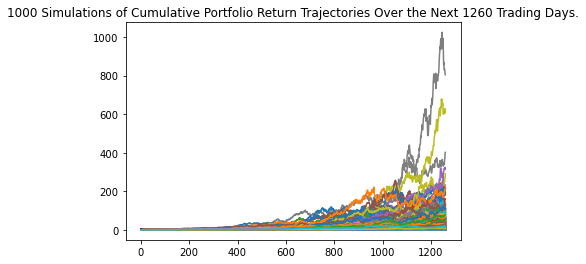

In [21]:
plot = MC.plot_simulation()

simulated_returns_data = {
    'mean': list(MC.simulated_return.mean(axis=1)),
    'median': list(MC.simulated_return.median(axis=1)),
    'min': list(MC.simulated_return.min(axis=1)),
    'max': list(MC.simulated_return.max(axis=1)),
}


pd.options.display.float_format = '{:,.6f}'.format
df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns.head()

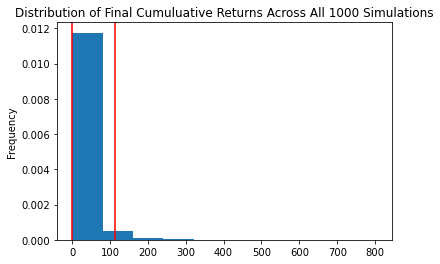

In [22]:
dist_plot = MC.plot_distribution()